In [50]:
import ngsolve as ngs
import numpy as np
import matplotlib.pyplot as plt

mu0 = 1.256636e-6
nu0 = 1/mu0

k1 = 49.4; k2 = 1.46; k3 = 520.6;
f = lambda B : (k1*ngs.exp(k2*B**2)+k3)*B
fd = lambda B : 2*k1*k2*B**2*ngs.exp(k2*B**2) + k1*ngs.exp(k2*B**2) +k3

fl = lambda B : nu0*B

p = (np.log((nu0-k3)/k1)/k2)**(1/2)

In [69]:
B = np.arange(0,2.575765268073557,0.1)

2.575765268073557

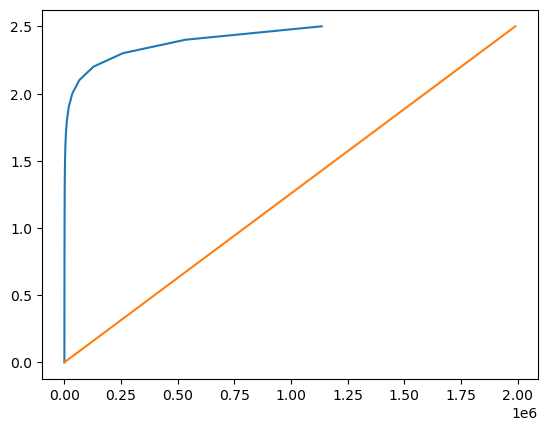

In [70]:
plt.plot(f(B),B)
plt.plot(fl(B),B)
p